[*********************100%%**********************]  1 of 1 completed


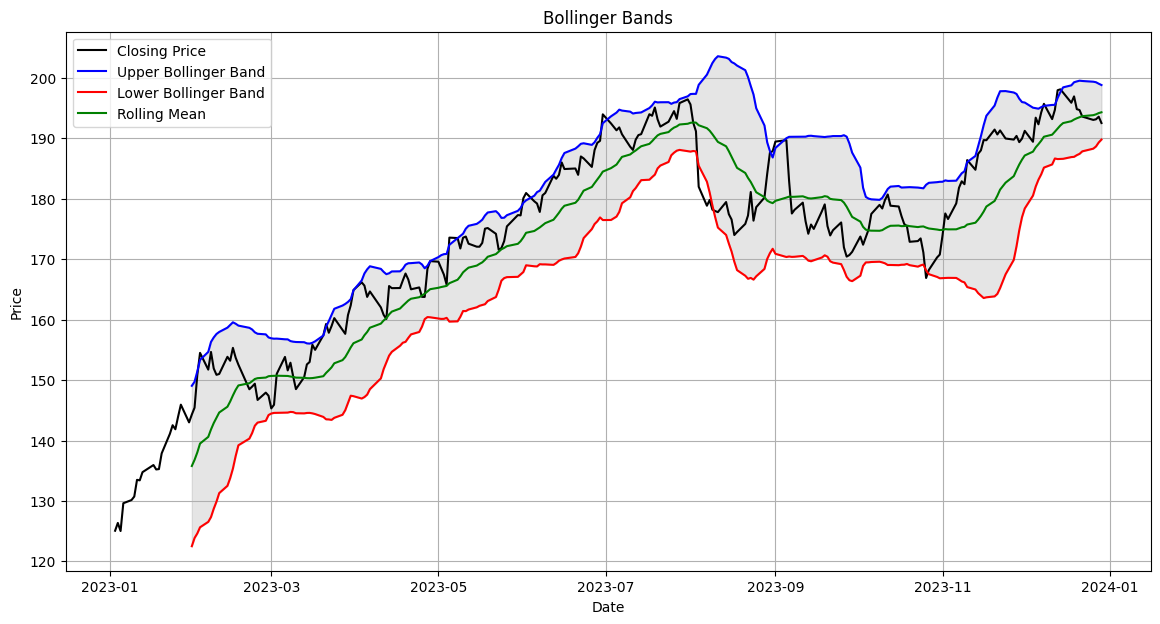

In [8]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

def calculate_bollinger_bands(data, window=20, num_std_dev=2):
    # Calculate the rolling mean and standard deviation
    data['Rolling_Mean'] = data['Close'].rolling(window=window).mean()
    data['Rolling_Std'] = data['Close'].rolling(window=window).std()

    # Calculate the upper and lower Bollinger Bands
    data['Bollinger_Upper'] = data['Rolling_Mean'] + (data['Rolling_Std'] * num_std_dev)
    data['Bollinger_Lower'] = data['Rolling_Mean'] - (data['Rolling_Std'] * num_std_dev)

    return data

def plot_bollinger_bands(data):
    plt.figure(figsize=(14,7))

    # Plot the closing price and Bollinger Bands
    plt.plot(data.index, data['Close'], label='Closing Price', color='black')
    plt.plot(data.index, data['Bollinger_Upper'], label='Upper Bollinger Band', color='blue')
    plt.plot(data.index, data['Bollinger_Lower'], label='Lower Bollinger Band', color='red')
    plt.plot(data.index, data['Rolling_Mean'], label='Rolling Mean', color='green')

    plt.fill_between(data.index, data['Bollinger_Upper'], data['Bollinger_Lower'], color='gray', alpha=0.2)

    plt.title('Bollinger Bands')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc='upper left')
    plt.grid()
    plt.show()

# Example usage
ticker = 'AAPL'
start_date = '2023-01-01'
end_date = '2023-12-31'
window = 20  # Example window size for rolling mean and standard deviation
num_std_dev = 2  # Number of standard deviations for the bands

stock_data = get_stock_data(ticker, start_date, end_date)
stock_data_bollinger = calculate_bollinger_bands(stock_data, window, num_std_dev)
plot_bollinger_bands(stock_data_bollinger)
